In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
%matplotlib inline

## Linear Regression

In [15]:
from sklearn.datasets import load_boston

boston = load_boston()
print(boston.data.shape)       # (506, 13)
print(boston.feature_names)  # Column names
#print(boston.DESCR)        # brief desc.
df = pd.DataFrame(boston.data)
df.columns = boston.feature_names
df.head()

(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [18]:
df['Price'] = boston.target

In [22]:
from sklearn.model_selection import train_test_split

X = df.drop('Price',axis=1)

X_train,X_test,y_train,y_test = train_test_split(X, df['Price'],test_size=0.33,random_state=42)

In [25]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train,y_train)
pred_test = lm.predict(X_test)

Text(0, 0.5, 'Predicted Price')

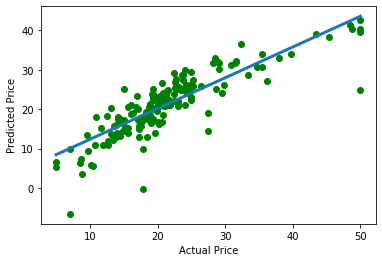

In [39]:
plt.scatter(y_test,pred_test,c='g')
plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, pred_test, 1))(np.unique(y_test)),linewidth = 3)    
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

In [50]:
coeff_df = pd.DataFrame(lm.coef_,X_train.columns)
print(coeff_df)
mse = sklearn.metrics.mean_squared_error(y_test, pred_test)
print(mse)

                 0
CRIM     -0.128750
ZN        0.037823
INDUS     0.058211
CHAS      3.238668
NOX     -16.169812
RM        3.902051
AGE      -0.012851
DIS      -1.422224
RAD       0.234854
TAX      -0.008213
PTRATIO  -0.928722
B         0.011770
LSTAT    -0.547566
20.72402343733974


#### Exercise

In [85]:
df = pd.read_csv('data2.csv',sep='\s+')
df.columns = ['CityFrom','CityTo','AvgFare','Distance','AvgWeekPsgrs','MktLeadArLn','MktShare','AvgFareLead',
              'LowPriceArLn','MktShareLow','Price']

In [87]:
from sklearn.model_selection import train_test_split

X = df.drop(['CityFrom','CityTo', "MktLeadArLn", "LowPriceArLn", "Price"],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,df['Price'],test_size=0.33,random_state=4)

In [90]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train,y_train)
pred_test = lm.predict(X_test)

Text(0, 0.5, 'Predicted Price')

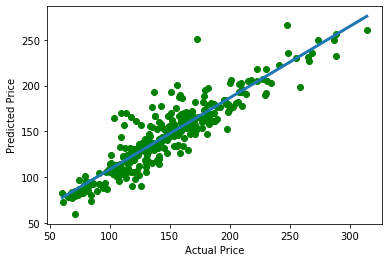

In [93]:
plt.scatter(y_test,pred_test,c='g')
plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, pred_test, 1))(np.unique(y_test)),linewidth = 3)    
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

In [94]:
coeff_df = pd.DataFrame(lm.coef_,X_train.columns)
print(coeff_df)
mse = sklearn.metrics.mean_squared_error(y_test, pred_test)
print(mse)

                     0
AvgFare       1.047904
Distance      0.005132
AvgWeekPsgrs -0.001581
MktShare     -0.331376
AvgFareLead  -0.274707
MktShareLow   0.405139
342.0925401023232


## Logistic Regression